# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing K Means Clustering Model and its Silhouette Score tool. 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
# Initializing the Function.
kmeans = KMeans(n_clusters=8)

# Feeding the data into the Model. 
wine_clusters = kmeans.fit(X)
y_pred = wine_clusters.predict(X)

# Printing the Silhouette Score
print('The Silhouette Score for our Model is {}.'.format(silhouette_score(X, y_pred)))

The Silhouette Score for our Model is 0.5398971441034137.


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
# Initializing the Function.
kmeans_5 = KMeans(n_clusters=5)

# Feeding the data into the Model. 
wine_clusters_5 = kmeans_5.fit(X)
y_pred_5 = wine_clusters_5.predict(X)

# Printing the Silhouette Score
print('The Silhouette Score for our Model with 5 Clusters is {}.'.format(silhouette_score(X, y_pred_5)))

The Silhouette Score for our Model with 5 Clusters is 0.5489993239795691.


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
# Initializing the Function.
kmeans_3 = KMeans(n_clusters=3)

# Feeding the data into the Model. 
wine_clusters_3 = kmeans_3.fit(X)
y_pred_3 = wine_clusters_3.predict(X)

# Printing the Silhouette Score
print('The Silhouette Score for our Model with 3 Clusters is {}.'.format(silhouette_score(X, y_pred_3)))

The Silhouette Score for our Model with 3 Clusters is 0.5711381937868844.


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

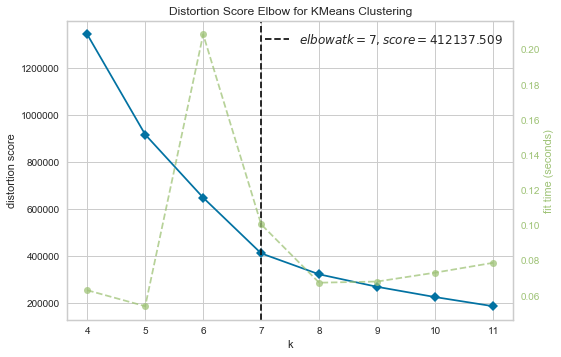

In [7]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
visualizer.poof()

In [10]:
# So the thing says 7 clusters will do the work just fine, let's see. 

# Initializing the Function.
kmeans_7 = KMeans(n_clusters=7)

# Feeding the data into the Model. 
wine_clusters_7= kmeans_7.fit(X)
y_pred_7 = wine_clusters_7.predict(X)

# Printing the Silhouette Score
print('The Silhouette Score for our Model with 7 Clusters is {}.'.format(silhouette_score(X, y_pred_7)))

The Silhouette Score for our Model with 7 Clusters is 0.5616196384056903.


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

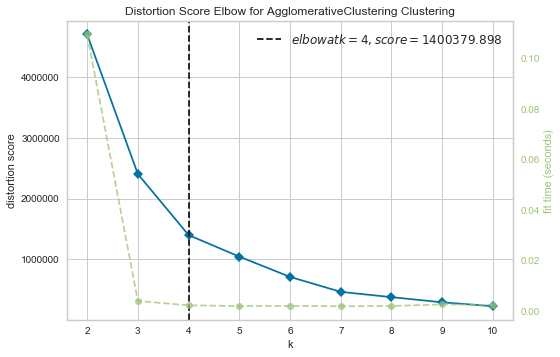

In [9]:
from sklearn.cluster import AgglomerativeClustering

visualizer = KElbowVisualizer(AgglomerativeClustering())
visualizer.fit(X)
visualizer.poof()

In [11]:
# From my understanding, 4 is now the optimal Clusterization Model. 

# Initializing the Function.
kmeans_4 = KMeans(n_clusters=4)

# Feeding the data into the Model. 
wine_clusters_4= kmeans_4.fit(X)
y_pred_4 = wine_clusters_4.predict(X)

# Printing the Silhouette Score
print('The Silhouette Score for our Model with 4 Clusters is {}.'.format(silhouette_score(X, y_pred_4)))

The Silhouette Score for our Model with 4 Clusters is 0.5620915308951067.


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

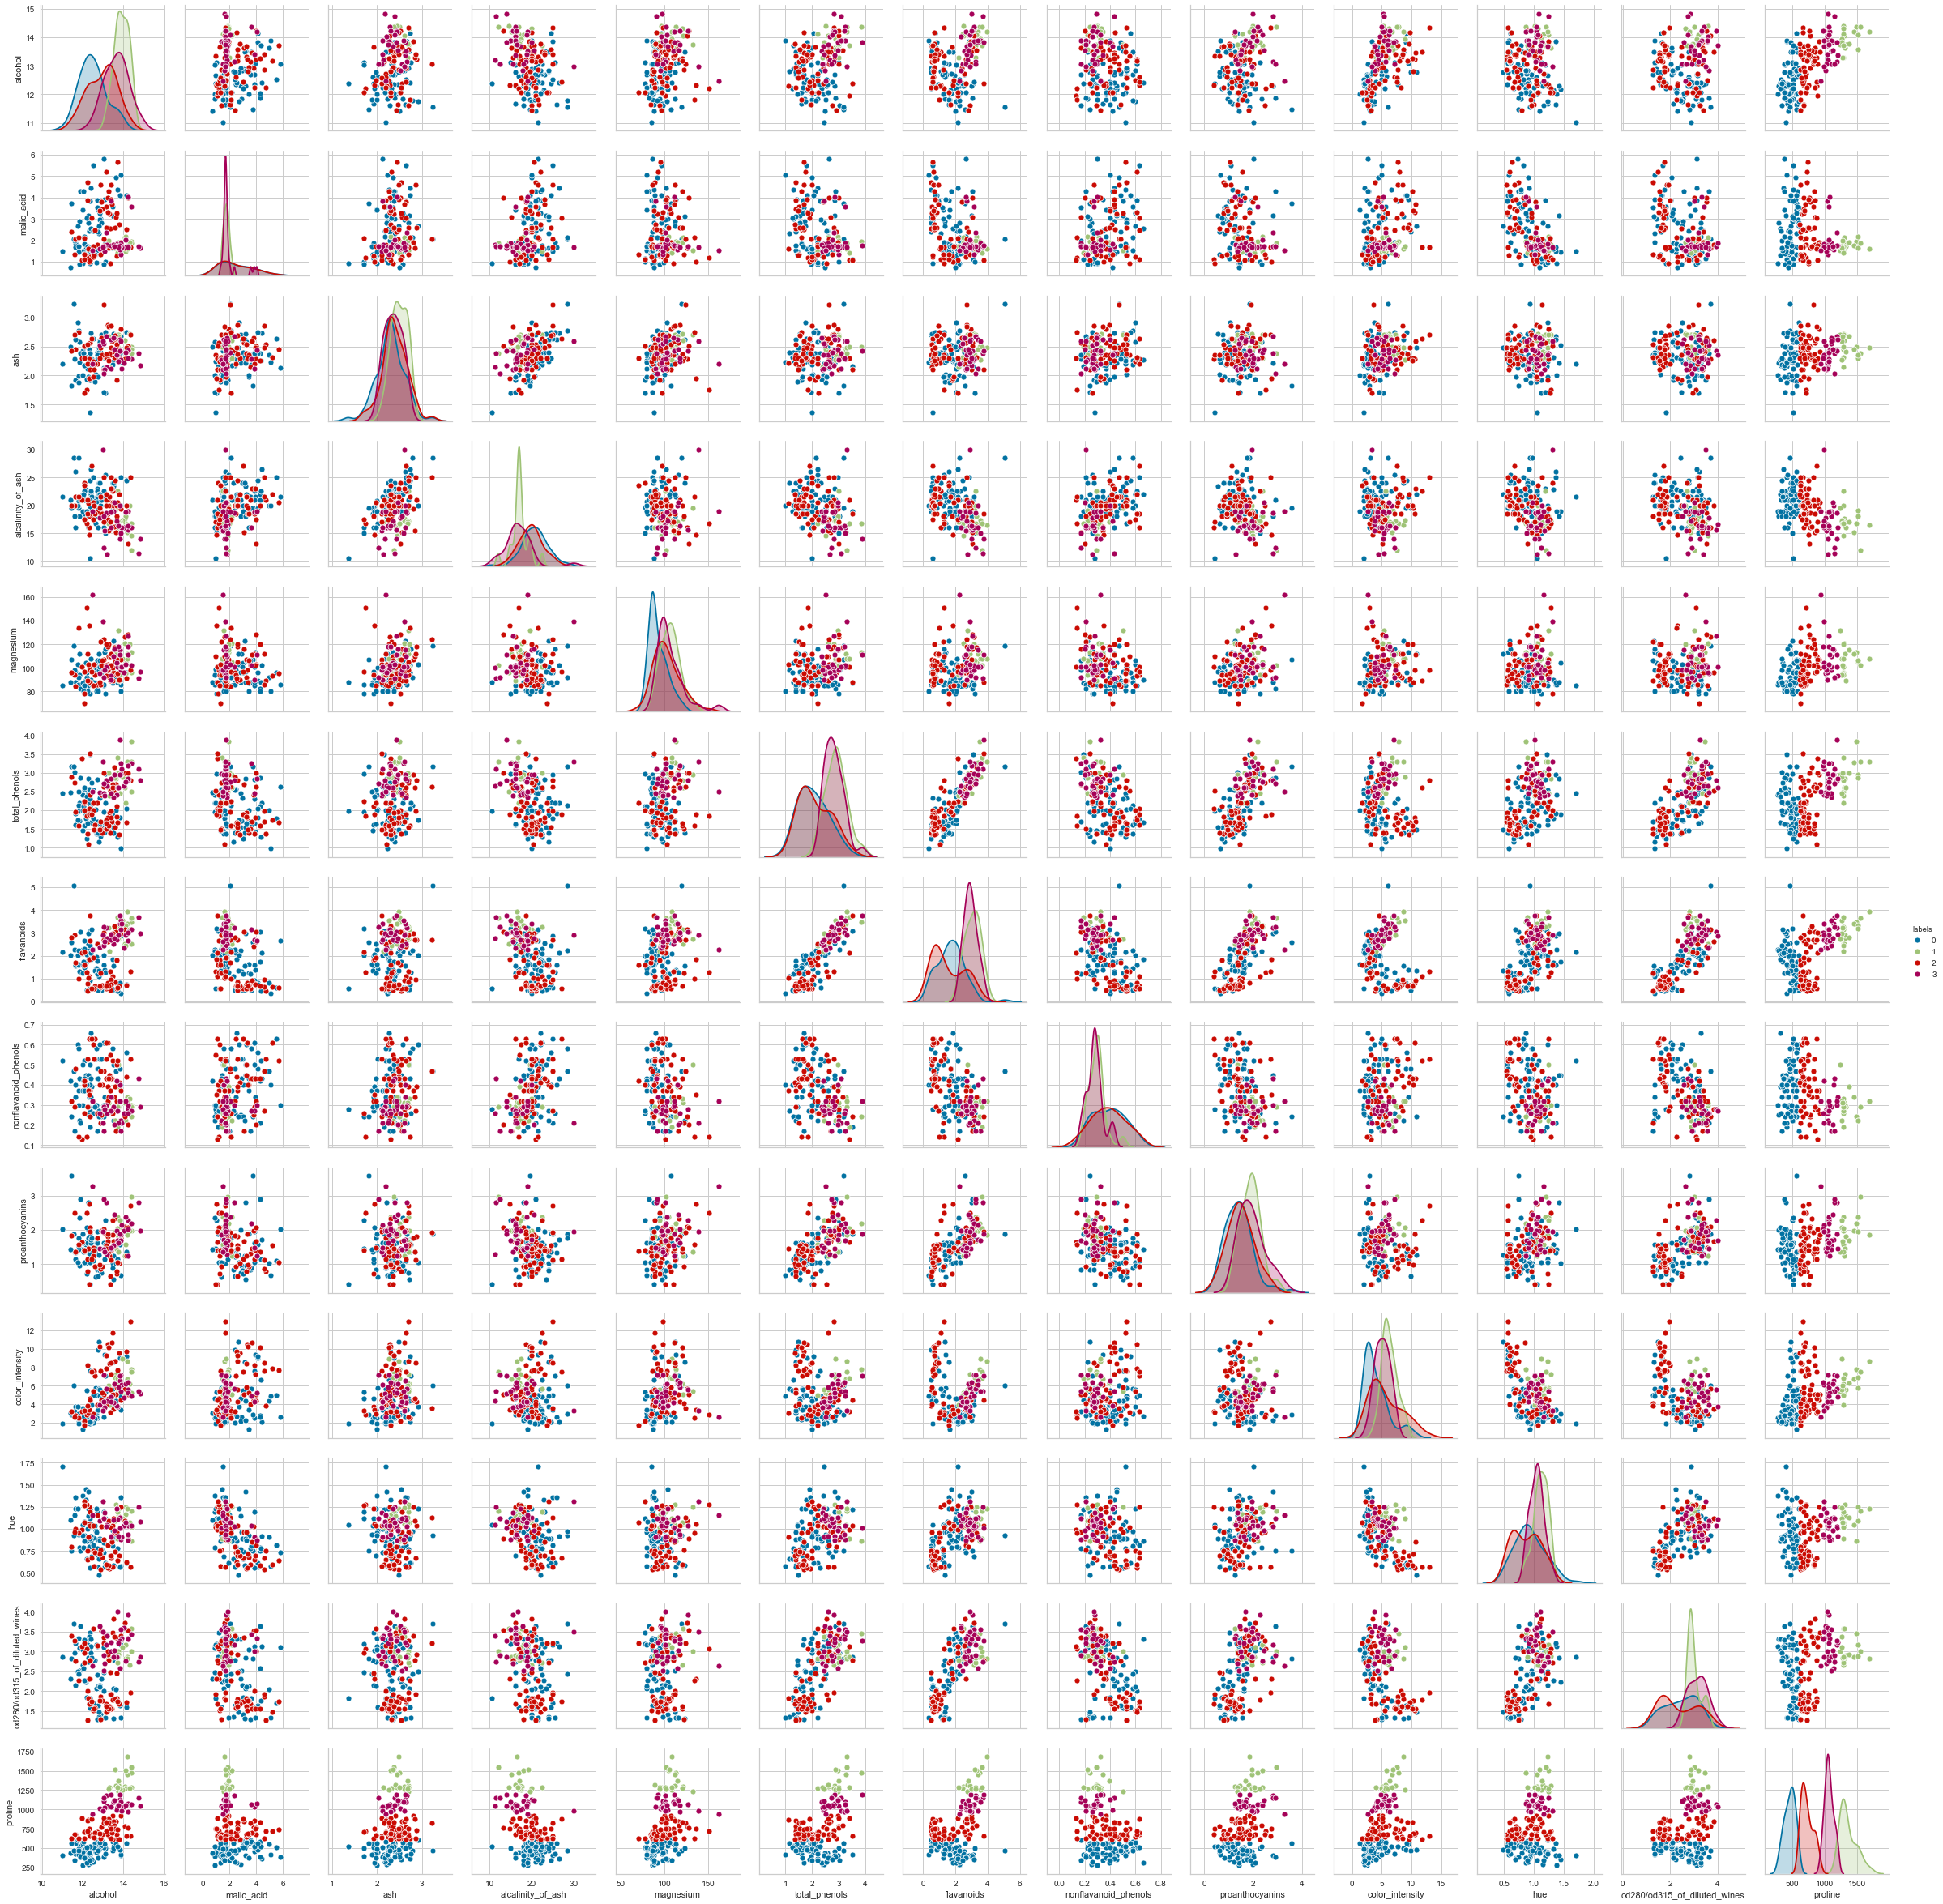

In [14]:
ac_c = AgglomerativeClustering(n_clusters=4)
ac_c.fit(X)
X['labels'] = ac_c.labels_
sns.pairplot(X, hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

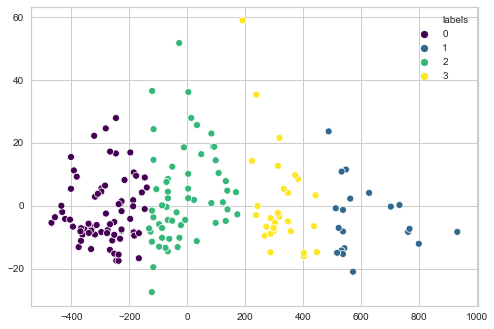

In [15]:
from sklearn.decomposition import PCA

pca = PCA().fit(X.drop(columns='labels'))
X_pca = pca.transform(X.drop(columns='labels'))
X_pca

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['labels'], palette='viridis')

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

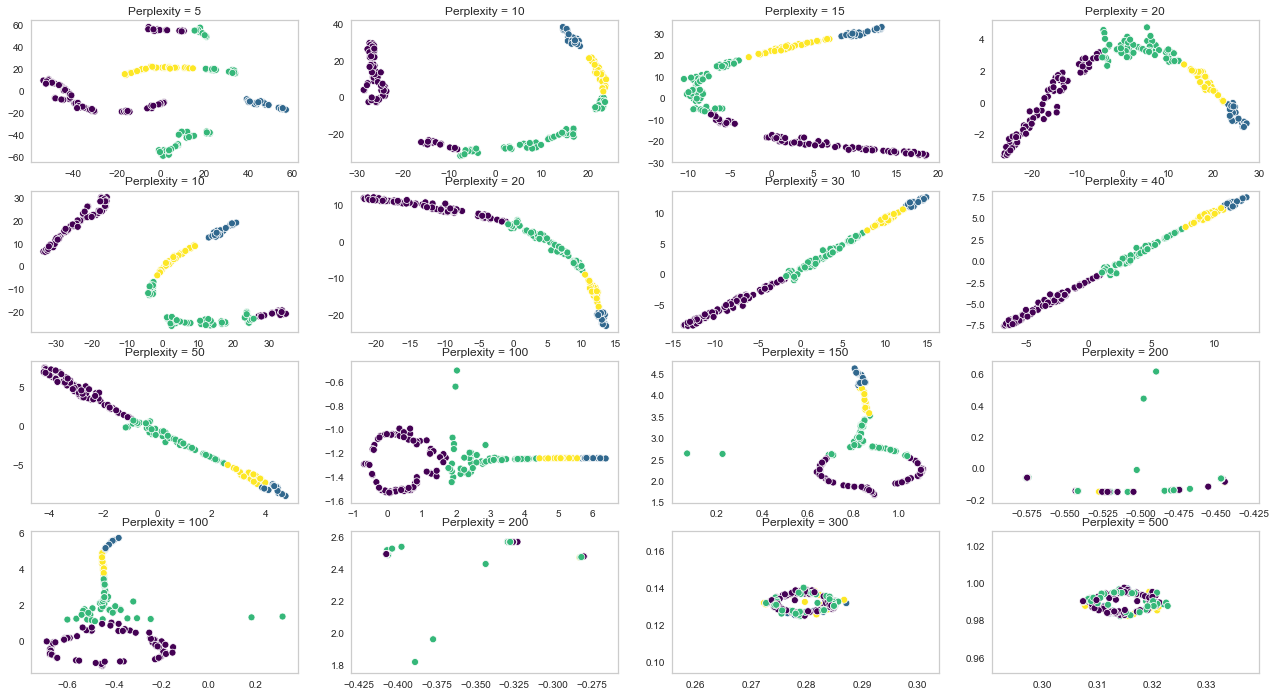

In [16]:
from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = (22,12)
fig, axes = plt.subplots(4,4)

per = [[5,10,15,20],[10,20,30,40],[50,100,150,200],[100,200,300,500]]

for i in range(4):
    for j in range(4):
        p = per[i][j]
        tsne = TSNE(perplexity=p)
        X_tsne = tsne.fit_transform(X_pca)
        sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=X.labels, palette='viridis', ax=axes[i,j], legend=False)
        axes[i,j].set_title(f'Perplexity = {p}')
        axes[i,j].grid(False)

plt.show()